In [144]:
# @file        : soru2_b141210306_emre_bodur.ipynb
# @description : Python dili, "TensorFlow" kütüphanesi ile Derin Öğrenme (Görüntü İşleme)
# @course      : Pratikte BT Ve BS Uygulamaları
# @assignment  : 2. Proje Ödevi
# @date        : 26.05.2021
# @author      : Emre Bodur (B141210306)

In [145]:
# Proje ile ilgili kütüphaneler dahil ediliyor.
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [146]:
#Fashion MNIST veri kümesini içe aktar
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [147]:
#Her görüntü tek bir etiketle eşleştirilir. 
#Sınıf adları veri kümesine dahil edilmediğinden, daha sonra görüntüleri çizerken kullanmak için class_names değişkenine atadım.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [148]:
# veri sayılarını getir.
# eğitim setinde her bir görüntünün 28 x 28 piksel olarak temsil edildiği 60.000 görüntü bulunmaktedır.
train_images.shape

(60000, 28, 28)

In [149]:
# test veri seti bilgilerini getir.
# test veri setinde 10000 adet 28x28 piksel ebatlarında görüntü bulunmaktadır.
test_images.shape

(10000, 28, 28)

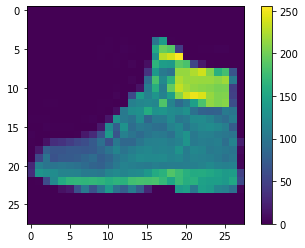

In [150]:
# Ağı eğitmeden önce veriler önceden işlenmelidir. 
# Eğitim setindeki 90. resmi incelerseniz, piksel değerlerinin 0 ile 255 aralığında olduğunu göreceksiniz:
plt.figure()
plt.imshow(train_images[90])
plt.colorbar()
plt.grid(False)
plt.show()

In [151]:
# Bu değerleri sinir ağı modeline beslemeden önce 0 ila 1 aralığında ölçeklendirilir. 
# Bunu yapmak için piksel değerlerini 255'e bölmeliyiz. 
# Eğitim seti ve test setinin aynı şekilde ön işlemden geçirilmesi önemlidir:

train_images = train_images / 255.0
test_images = test_images / 255.0

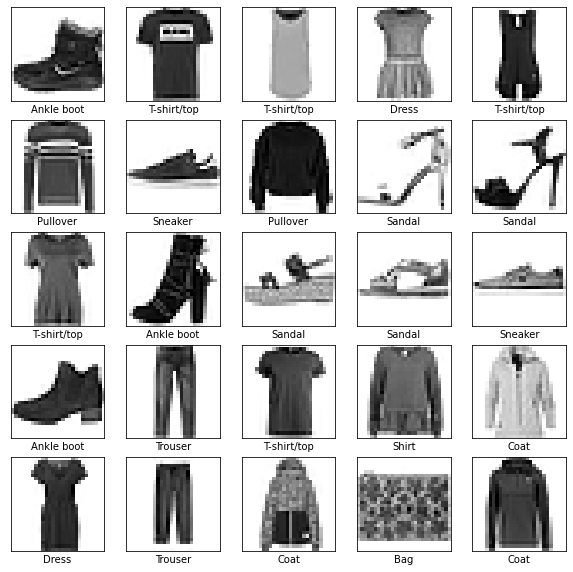

In [152]:
# Verilerin doğru biçimde olduğunu ve ağı kurmaya ve eğitmeye hazır olduğunuzu doğrulamak için eğitim setinden 
# ilk 25 görüntüyü gösterelim ve her görüntünün altında sınıf adını gösterelim.

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [153]:
# Modeli oluşturalım
# Sinir ağını oluşturmak, modelin katmanlarını yapılandırmayı ve ardından modeli derlemeyi gerektirir.
# TensorFlow bir model tanımlamanın iki yolunu sunar.
# Sequential, katmanları yığmak için kullanılır ve en sık kullanılan model budur.

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [154]:
# model derleniyor
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [155]:
# model eğitiliyor
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 518us/step - loss: 0.4970 - accuracy: 0.8257
Epoch 2/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.3719 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.3327 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 1s 521us/step - loss: 0.3104 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 1s 518us/step - loss: 0.2923 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 1s 518us/step - loss: 0.2771 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 1s 521us/step - loss: 0.2665 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 1s 524us/step - loss: 0.2561 - accuracy: 0.9054
Epoch 9/10
1875/1875 [==============================] - 1s 526us/step - loss: 0.2462 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 1s 529u

In [156]:
# Doğruluğu değerlendir
# modelin eğitilmesinin ardından, modelin test veri kümesinde nasıl performans gösterdiğini karşılaştır
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy: (%)', 100*test_acc)

313/313 - 0s - loss: 0.3450 - accuracy: 0.8820

Test accuracy: (%) 88.20000290870667


In [157]:
# Test veri setindeki doğruluğun, eğitim veri setindeki doğruluktan biraz daha az olduğu ortaya çıktı. 
# Eğitim doğruluğu ve test doğruluğu arasındaki bu boşluk, aşırı uyumu temsil eder. 
# Aşırı uyum, bir makine öğrenimi modelinin yeni, daha önce görülmemiş girdilerde 
# eğitim verilerinde olduğundan daha kötü performans göstermesi durumunda meydana gelir. 
# Aşırı uyumlu bir model, eğitim veri setindeki gürültüyü ve ayrıntıları, 
# modelin performansını yeni veriler üzerinde olumsuz olarak etkileyecek bir noktaya kadar "ezberler".

In [158]:
# Eğitilen modeli bazı görüntüler hakkında tahminlerde bulunalım
# Sonuçları yorumlanması daha kolay olan olasılıklara dönüştürmek için bir softmax katmanı eklemeliyiz.
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [159]:
#Burada model, test setindeki her bir görüntü için etiketi tahmin etmiştir.
predictions = probability_model.predict(test_images)

In [160]:
# Resmi çizmek için kullanılan fonksiyon
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("TAHMİN:{} {:2.0f}% (GERÇEK:{})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# grafiğin çizilmesi için kullanılan fonksiyon
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

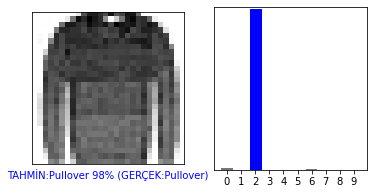

In [161]:
# Test seti kullanılarak eğitilen model ile bazı görüntüleri tahmin etmek isteyebilirsiniz.
# i değerini değiştirerek istenilen görüntü ile ilgili tahminde bulunabilirsiniz.
# i değeri 40 girilirse %96 doğrulukta tahmin yapılan (ancak hatalı) bir örnek görülebilir.
# i değeri 20 girilise %100 doğrulukta tahmin yapılan bir örnek görülebilir.
# Doğruluk değerleri modelin her eğitilmesinde değişebiliyor.

i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [162]:
print('SONUÇLAR')
print('Tahmin edilen görüntü: ' + class_names[np.argmax(predictions[i])])
print('Gerçek görüntü: ' + class_names[np.argmax(predictions[i])])
print('Doğruluk Oranı: ', 100*np.max(predictions[i]))

SONUÇLAR
Tahmin edilen görüntü: Pullover
Gerçek görüntü: Pullover
Doğruluk Oranı:  98.2964038848877
